### Index Decomposition of the drivers behind the Sustainable Development Index of Costa Rica

#### Scope and Table of Contents

In [2]:
# Costa Rica is for many years the best performing country in terms of the Sustainable Development Index (SDI). 
# In this script we analize some of the matarial conditions behind the high performing Sustainable Development Indicator (SDI) of Costa Rica.
# By introducing MFA-Indicators and organize the SDI Equation in a Kaya-Equation like manner, we gain understanding of these conditions
#  through the use of index decomposition analysis.
# 
# Script-Overview:
#   (0) Legend of indicators and the herein choosen drivers. 
#   (1) Summary of the results.
#   (2) Used Data
#   (3) Define functions to process data 
#   (4) Calculate relevant indicators and drivers
#   (5) Plot indicators and drivers
#       - Figure 1: SDI, DI, EII and MF, DMC
#       - Figure 2: SDI, (MF/EII), (DMC/MF), (DI/DMC)
#       - Figure 3: Relative (base year 1990): SDI, (MF/EII), (DMC/MF), (DI/DMC)
#   (6) Disussion and outlook

#### Legend of indicators and proposed extension of the SDI equation

In [ ]:
# Original SDI Equation:
# Sustainable Development Indicator (SDI); Development Indicator (DI); Ecological Impact Indicator (EII)
# SDI = DI / EII (See Hickel, Jason. 2020)
#
# MFA Indicators to be studied:
# Material Footprint (MF), Domestic Material Consumption (MC)
#
# The ansatz of this work is to consistantly introduce the following Intensities and Efficiencies (we call them Drivers):
# Ecological Material Efficiency (MF/EII)
# Economic Internalization Rate (DMC/MF)
# Social Material Intensity (DI/DMC)
# Note: These names are not from literature, but introduced here for convience. 
# The choosen names do not nessesarilly reflect the whole extend of what the drivers operationalize.
# 
# We get: SDI = DI/EII = (DI/DMC)*(DMC/MF)*(MF/EII)

#### Summary

In [3]:
# Summary of the Analysis
# The SDI grows steadilly form 1990 to 2022 (Figure 1). At first it appears, that DI leads to a overall better performance of the SDI, 
# scince the EII stays const over the period of time. 
# Introducing MFA-Indicators via a 'Kaya-like-Equation',  the picture shifts the attention from the DI towards the EII. Looking at the material conditions, 
# it appears, that the rise of the DI is tightly bound to material inputs (and likely the expansion of infrastructure). 
# Ultimatly it seems, the rise of SDI is due
# to a improving Ecological Material Efficiency (lower environmental impact per kg).
#
# To see how these findings stay in relation to Costa Ricas position in the worlds system, read the broader discussion and outlook at the end of the script.

#### Used Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

from matplotlib.ticker import MultipleLocator

#### Used Data

In [6]:
# This is the 2024 'Sustainable Development Index' data time series 1990 to 2022 for 163 countries
# Source: https://www.sustainabledevelopmentindex.org/time-series
# Author and original work: Hickel, Jason. 2020. “The Sustainable Development Index: Measuring the Ecological Efficiency of Human Development in the Anthropocene,”
# It includes spread sheets covering: SDI, Life Expectancy (years), Expected Years of Schooling, ->
# Mean Years of Schooling, GNI pcap. const 2017$ PPP, CO2 emissions per cap (tonnes), Mat. Footprint pcap (tonnes)
dataSDI = pd.ExcelFile('SDI+and+Components+(1990-2022).xlsx')

# Creating seperat dataframes for each socio-ecological indicator

dfSDI = pd.read_excel(dataSDI, 'SDI')
dfSDIT = dfSDI.T

dfLE = pd.read_excel(dataSDI, 'Life Expectancy (years)')
dfLET = dfLE.T

dfES = pd.read_excel(dataSDI, 'Expected Years of Schooling')
dfEST = dfES.T

dfMS = pd.read_excel(dataSDI, 'Mean Years of Schooling')
dfMST = dfMS.T

dfGNI = pd.read_excel(dataSDI, 'GNI pcap. const 2017$ PPP')
dfGNIT = dfGNI.T

# The data for consumption-based CO2 emissions is derived from EORA-PRIMAP. 
dfCO2 = pd.read_excel(dataSDI, 'CO2 emissions pcap (tonnes)')
dfCO2T = dfCO2.T

#The data for material footprint is derived from the UN International Resource Panel Global Material Flows database.
dfMF = pd.read_excel(dataSDI, 'Mat. Footprint pcap (tonnes)')
dfMFT = dfMF.T

In [7]:
# This is the 2024 'Domenstic Material Consumption' data time series 1970 to 2024 for 163 countries (Global Material Flows Database)
# Source: https://www.resourcepanel.org/global-material-flows-database
# Institutions involved developing: Csiro, WU Vieanna, BOKU Vianna, Nagoya University
# Whole Database constitutes of typical MEFA indicators (up to 13 Material-Flows in tonnes per year), MF Indicator (MRIO) and Economic Indicators GDP (const.). 
# Critical Intensities (DMC/GDP ect. ) can be found there.
# For this analysis we download DMC/cap
dfDMC = pd.read_csv("mfa_dmc_pc_CRI.csv")
dfDMCT = dfDMC.T

#### Define functions

In [8]:
# Here we set the Functions to calculate the Development Index and Eceological Impact Index (Hickl, 2020)

def LEI(x):
    '''Function for the Life Expectancy Index. Takes as variable: Life Expectancy (years)'''
    return (x - 20)/(85-20)

def EI(x,y):
     '''Function for the Education Index. Variable: Mean Years of Schooling and Expected Years of Schooling'''
     return (x + y)/2

def II(x):
    '''Function for the Income Index. Variable: GNI pcap. const 2017$ PPP'''
    return (np.log(x) - np.log(100))/(np.log(20000)-np.log(100))

def DI(a,x,y,z):
    '''Function for the Development Index. Takes: Life Expectancy (years); Mean Years of Schooling; Expected Years of Schooling; Variable: GNI pcap. const 2017$ PPP'''
    return (LEI(a)*EI(x,y)*II(z))**(1/3)


def EII(s,a,x,y,z):
    '''Ecological Impact Index. Is calculated indirectly (because CO2 Planetary Boundaries data is missing). Takes: SDI and DI(a,x,y,z) '''
    return DI(a,x,y,z)/s

#### Process Data

In [9]:
# The DI is iterated in a for loop, handing out an numpy array 'DevIndCRI'. 
# For some reasones the II funtion leads to NaN values when uses to calculate DI when using the whole collumns as inputs
# When going for a crosscountry analysis, this needs to be fixed.
lst = []
for x in range(2,35):
     if x >= 2:
          lst += [DI(dfLET.iat[x,37],dfMST.iat[x,37],dfEST.iat[x,37],dfGNIT.iat[x,37])]
     else:
        print('Somthing went wrong with the loop range')
DevIndCRI = np.array(lst)

In [10]:
# The EII is iterated in a for loop, handing out an numpy array 'EcoImpIndCRI'. 
# For some reasones the II funtion leads to NaN values when uses to calculate DI when using the whole collumns as inputs
lst = []
for x in range(2,35):
     if x >= 2:
          lst += [EII(dfSDIT.iat[x,37],dfLET.iat[x,37],dfMST.iat[x,37],dfEST.iat[x,37],dfGNIT.iat[x,37])]
     else:
        print('wrong len')
EcoImpIndCRI = np.array(lst)

In [11]:
# Creating a numpy arry for DMC/cap 'DMC'
lst = []
for x in range(2,35):
     if x >= 2:
          lst += [dfDMCT.iloc[22+x]]
     else:
        print('wrong len')
DMC = np.array(lst)


In [12]:
# Creating a numpy arry for MF/cap 'MF'
lst = []
for x in range(2,35):
     if x >= 2:
          lst += [dfMFT.iat[x,37]]
     else:
        print('wrong len')
MF = np.array(lst)

In [13]:
# Creating a numpy array for the Externalization Intensity DMC/MF
lst = []
for x in range(2,35):
     if x >= 2:
          lst += [dfDMCT.iloc[22+x]/dfMFT.iat[x,37]]
     else:
        print('wrong len')
DMCoverMF = np.array(lst)

In [14]:
# Creating numpy arrays for the Drivers of SDI
MFoverEI = dfMFT[37][2:]/EcoImpIndCRI # Ecological Material Efficiency, Consumption based
DMCoverMF = DMCoverMF # Rate of economic internalization. It sets the ratio between DMC and MF. It states how much of the economic activity is externalized.
DIoverDMC = np.array((DevIndCRI/dfDMCT.iloc[24:57].T).T) # Social Material Intensity. It states how efficient social ends are met by given ressource input.

#### Figures

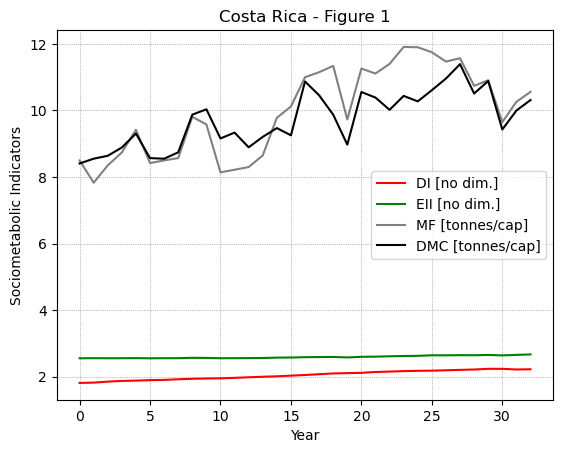

In [16]:
# Figure 1
# Plotting the SDI and Drivers for Costa Rica from 1990 to 2022

plt.plot(DevIndCRI, label='DI [no dim.]', color='red')
plt.plot(EcoImpIndCRI, label='EII [no dim.]', color='green')
plt.plot(MF, label='MF [tonnes/cap]', color='gray')
plt.plot(DMC, label='DMC [tonnes/cap]', color='black')

# Set a distance of 5 years for the time axes ticks
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=5))

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Sociometabolic Indicators')
plt.title('Costa Rica - Figure 1') 
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.5, color='gray', markersize=2)

# Display the plot
plt.show()

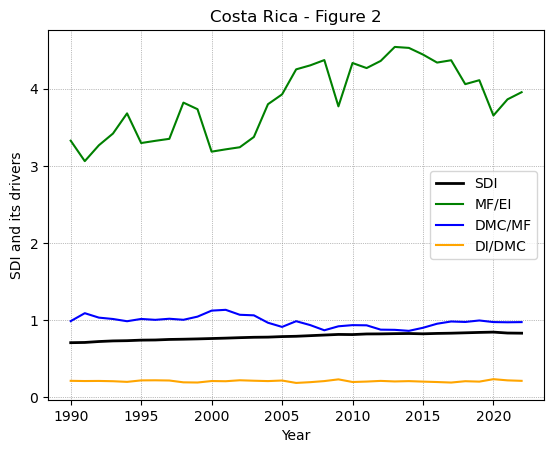

In [17]:
# Figure 2
# Plotting the SDI and Drivers for Costa Rica from 1990 to 2022

plt.plot(dfSDIT[37][2:], label='SDI', color='black', linewidth=2)
plt.plot(MFoverEI, label='MF/EI', color='green')
plt.plot(DMCoverMF, label='DMC/MF', color='blue')
plt.plot(DIoverDMC, label='DI/DMC', color='orange')

# Set a distance of 5 years for the time axes ticks
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=5))

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('SDI and its drivers')
plt.title('Costa Rica - Figure 2') 
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.5, color='gray', markersize=2)

# Display the plot
plt.show()

In [37]:
# See comments on the Results in the last line

C:\Users\admin\AppData\Local\Temp\ipykernel_19976\3276439122.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(dfSDIT[37][2:]/dfSDIT[37][2]*100-100, label='SDI/0.71', color='black', linewidth=2)
C:\Users\admin\AppData\Local\Temp\ipykernel_19976\3276439122.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(MFoverEI/MFoverEI[0]*100-100, label='(MF/EII)/3.32', color='green')


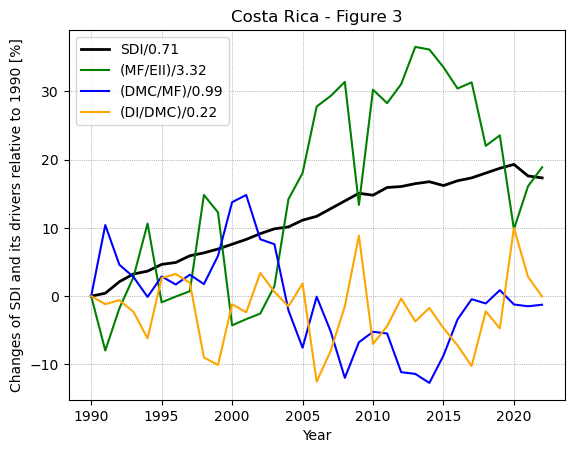

In [18]:
# Figure 3
# Plotting the RELATIVE SDI and RELATIVE Drivers for Costa Rica from 1990 to 2022. Origin 1990.
# This is similar to Kaya-Identity depiction (see https://en.wikipedia.org/wiki/Kaya_identity) and a basic form of Index Decomposition
# SDI = DI/EII = (DI/DMC)*(DMC/MF)*(MF/EII)

plt.plot(dfSDIT[37][2:]/dfSDIT[37][2]*100-100, label='SDI/0.71', color='black', linewidth=2)
plt.plot(MFoverEI/MFoverEI[0]*100-100, label='(MF/EII)/3.32', color='green')
plt.plot(DMCoverMF/DMCoverMF[0]*100-100, label='(DMC/MF)/0.99', color='blue')
plt.plot(DIoverDMC/DIoverDMC[0]*100-100, label='(DI/DMC)/0.22', color='orange')

# Set a distance of 5 years for the time axes ticks
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=5))

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Changes of SDI and its drivers relative to 1990 [%]')
plt.title('Costa Rica - Figure 3') 
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.5, color='gray', markersize=2)

# Display the plot
plt.show()

#### Discussion and outlook

In [ ]:
# Comments on the results

# Indicators:
# Sustainable Development Indicator (SDI); Development Indicator (DI); Ecological Impact Indicator (EII)
# SDI = DI / EII
# Decompostion is done in Kaya-Identity Manner: SDI = DI/EII = (DI/DMC)*(DMC/MF)*(MF/EII)
# Material Footprint (MF), Domestic Material Consumption (MC)

# Intensities and Efficiencies (Drivers):
# Ecological Material Efficiency (MF/EII)
# Economic Internalization Rate (DMC/MF)
# Social Material Intensity (DI/DMC)

# Results and Discussion:
#
# By examening the Sociometabolic indicators (Figure 1), the rise of the DI appears responsible for the better SDI. 
# The EII stays almost constant over time. 
#
# By introducing MFA indicators through a Kaya-Identity-style index decomposition 
# we can gain understanding of the materialistic reallities behind a better DI and constant EII.
#
# The gain of DI (related to Education, Income and Health standards) is sustained by a steadily rising demand of material requierements (DMC). 
# This is why the 'Social Material Intensity' stays almost const. over the period 1990-2022 (fluctuations of +-10%).See Figure 2 and Figure 3.
# The steadily increasing DI does hence not seem to relate to more efficient use of material inputs, 
# but rather pointig at an expansion of infrastructure and throughput, 
# insuring social services, such as health care and education ect., which might secure access to a broader population share.
#   -> To gain an broader understanding we need to 
#       (1) go into detail about material flows and add an energy perspective (most of the GHG emmisions), 
#       (2) study stock formation (MATSTOCK, or at least stock-building flow in- and outputs analysis) and 
#       (3) at the services they provide and to which part of society
#
# One could expect that Costa Rica (CRI) had a higher material footprint then DMC, since it posseses no/little heavy industry and 
# no domestic supply of fossil energy carrierer nor a extractive mining industrie (looking at energy (MEFA) data from OLADE, using sieLAC). 
# In order to sustain its economy, it relies on imports of these ressources, which are are bound to MFs. 
# However, Costa Ricas  appears to externalizes only little economic activity, (DMC/MF) stays within max +-15% of change rate from no externalization pressure.
# That does not mean, that Costa Rica would not take part in global trade. 
# Instead it means, that its material use is domestically (production based) of similar magnitude then its material footprint (consumption based).
#
# To make sence of this, one should discuss CRIs position in the World-System. It can be thought of being semi-perepheric. 
# After a economically protective period (prior to the 90s), it turned export orientated. 
# It's export structure consists of food production (Banana, Coffee...) and 
# since the 90s, it´s also positioned in the middle of the tech-value chain due to micro-chip industry and later on through medical devices (prostets ect.). 
# See for instance:
#   - "Quantifying Sustainable Development: The Future of Tropical Economies" Perez and Lecler, 2000; 
#   - "Industrial development strategies in Costa Rica", Paus, Eva (Year?);
#   - COMTRADE Database (Products and their monetary trade volume)
# This suggests that most of its footprints leave the country again with its products.
#   -> To further investigate this claim one should examine the export and value chain structure further, using possibly
#       (1) EEMRIOs (EXIOBASE, GLORIA...)
#       (2) And/Or look at trade data with its most important trade partners (USA,...) and calculate Material-Flows in arcordiance to MFA-Methods
#       (3) There is also evidence, that CRI acts as a core-country within the carebeans. It externalizes Land use to neighbouring countries (Folz, privat com.).
#---------
# Finally, we find that the SDI appears to be mostly driven by the Ecological Material Efficiency (MF/EII).
# The EII (which is a measure how much the planetary boundaries of MF and GHG emissions are transgressed) stays constant and
#  the MF grows steadily over time (Figure 1). Consequently the Ecological Material Efficiency (MF/EII) grows steadily, fluctuating in the same manner as the MF (Figure 2,3).
# This means, in the Period form 1990-2022, CRIs MF develops towardss a lower environmental impact.
# This Ecological Material Efficiency appears to make up most of the gain in the SDI. 
#   -> To further investigate 
#       (1) Go to lower aggreagation within MF
#       (2) Introduce a framework to connect diverse material/energy flows to it's environmetal pressures
#           -> Downscaled Planetary Boundaries (Häyhä et al., 2016)
#
# At last we point at the fact, that we can roughly identify two phases (1) 1990-2003 and (2) 2003-2022. 
# In both, the Ecological Material Efficiency drives the development. In the first phase however the other drivers contribute too, 
# the Economic Internalization Rate as much as the EcoMatEff. 
#   -> The next step would be to analize the changes over time in more detail. Applyingy a Index Decomposition for every 5 years seems insightfull.
#
# In the future one could systematically analize CRI economy, introducing greater parts of the process chain, and more detailed stock and flows, in a Kaya-Equation.
# Its also possible to performe a crosscountry analysis on this very ground. This could help identify relevant drivers behind a good/bad SDI.

